# Python packages

In [101]:
import torch
import numpy as np
import seaborn as sns
from torchvision import datasets

In [2]:
import os
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [16]:
import random
from PIL import Image
import glob
from pathlib import Path

# Pytorch Tutorial

In [4]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0958, 0.9610],
        [0.4581, 0.9748]]) 



In [6]:
# Attributes of a Tensor
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [9]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [10]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x16deddae0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x16deddba0>


In [11]:
ToTensor() # converts a PIL image into a FloatTensor
nn.Sequential() # ordered container of modules 

Sequential()

In [13]:
torch.__version__

'2.3.1'

# Kaggle (classifying cats and dogs)

In [70]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
image_path = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/"
walk_through_dir(image_path)

There are 2 directories and 1 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/'.
There are 2 directories and 0 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set'.
There are 0 directories and 4006 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/dogs'.
There are 0 directories and 4001 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/cats'.
There are 2 directories and 1 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set'.
There are 0 directories and 1013 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set/dogs'.
There are 0 directories and 1012 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set/cats'.


In [73]:
train_dir = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set"
test_dir = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set"
train_dir, test_dir

('/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set',
 '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set')

random image path: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/dogs/dog.3491.jpg
image height: 500
image width: 369
image class: <class 'PIL.JpegImagePlugin.JpegImageFile'>


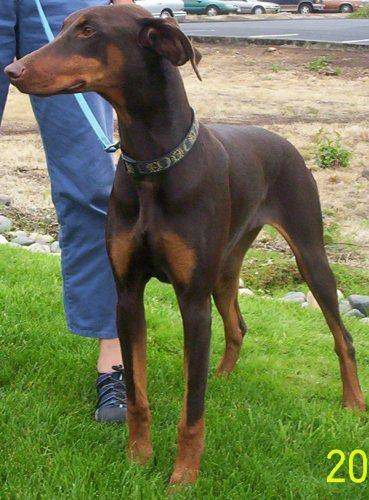

In [81]:
random.seed(42)
pattern = os.path.join(image_path, '*', '*', '*.jpg')

# Get the list of image paths
image_path_list = glob.glob(pattern)

random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

print(f"random image path: {random_image_path}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
print(f"image class: {img.__class__}")
img

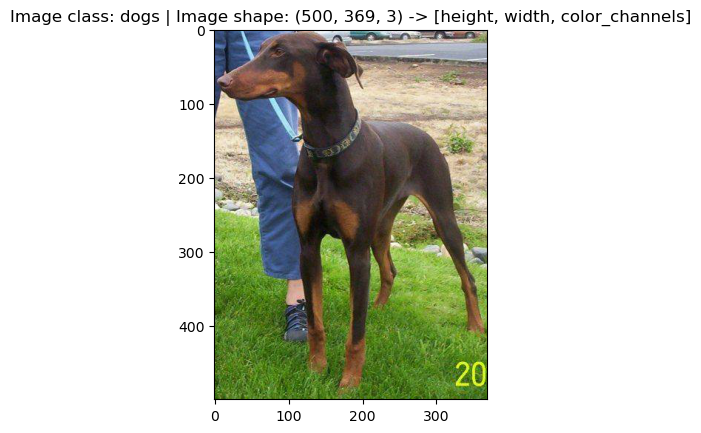

In [87]:
sns.set_theme
img_as_array = np.asarray(img)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.imshow(img_as_array)

In [97]:
new_height = 128
new_width = 128
new_size = (new_height, new_width)

data_transform = transforms.Compose([transforms.Resize(size= new_size),transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])



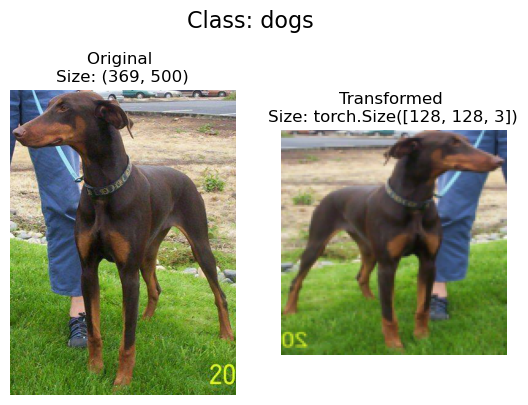

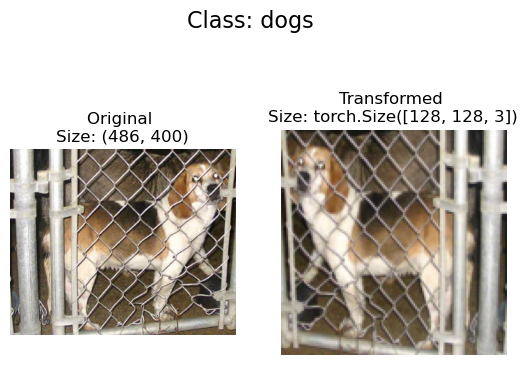

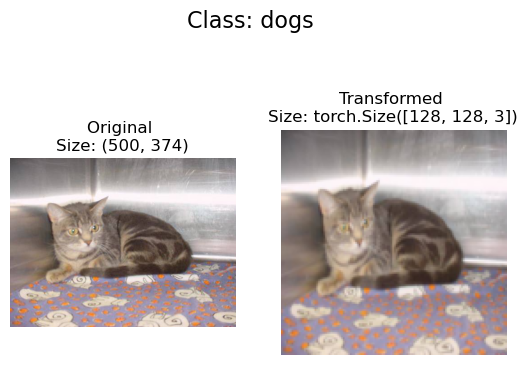

In [99]:
def plot_transformed_images(image_paths, transform, n=3, seed = 42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)



In [102]:
# Creating training set
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)
#Creating test set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 8005
    Root location: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2023
    Root location: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [103]:
class ImageClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2)) 
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
# Instantiate an object.
model = ImageClassifier().to(device)

In [105]:
train_transform = transforms.Compose([transforms.Resize(new_size), transforms.TrivialAugmentWide(),transforms.ToTensor()])
test_transform= transforms.Compose([transforms.Resize(new_size), transforms.TrivialAugmentWide(), transforms.ToTensor()])

In [106]:
train_data_augmented = datasets.ImageFolder(train_dir, transform = train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform = test_transform)


In [107]:
BATCH_SIZE = 32
NUM_WORKERS = 42
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 42 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(<torch.utils.data.dataloader.DataLoader at 0x2904297d0>,
 <torch.utils.data.dataloader.DataLoader at 0x290429490>)

In [108]:
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")